In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class ExpectedSARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        next_q_value = sum(self.q_values[next_state]) / len(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
obs = env.reset()

agent_position = obs[0]

agent = ExpectedSARSA(3, agent_position)

In [5]:
rewards = []
for ep in range(5000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()


episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0.694
episode: 620, rewards: 0.532
episode: 640, rewards: 0.09999999999999998
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0.33399999999999996
episode: 720, rewards: 0.4959999999999999
episode: 740, rewards: 0.532
episode: 760, 

In [6]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.00024, 0.00023, 0.00037],
 12: [0.00085, 0.00082, 0.00204],
 24: [0.00259, 0.00267, 0.00573],
 27: [0.00233, 0.00201, 0.02306],
 39: [0.06328, 0.06452, 0.16756],
 3: [3e-05, 3e-05, 0.00014],
 15: [0.00017, 0.00018, 0.00232],
 18: [0.00064, 0.00083, 0.00977],
 6: [0.00012, 0.00012, 0.00052],
 9: [0.00079, 0.00079, 0.0012],
 36: [0.0085, 0.00851, 0.01059],
 21: [0.00882, 0.00881, 0.02552],
 33: [0.06586, 0.06369, 0.20937],
 30: [0.00653, 0.00703, 0.08427],
 45: [0.0, 0.0, 0.0],
 42: [0.21, 0.20227, 0.37398]}

In [7]:
show_video()

In [8]:
pd.Series(rewards).to_csv('./logs/rewards_expectedsarsa.csv')

/home/johnny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [9]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]
exp_sarsa_logs = pd.read_csv('./logs/rewards_expectedsarsa.csv', index_col=False).iloc[:, 1]

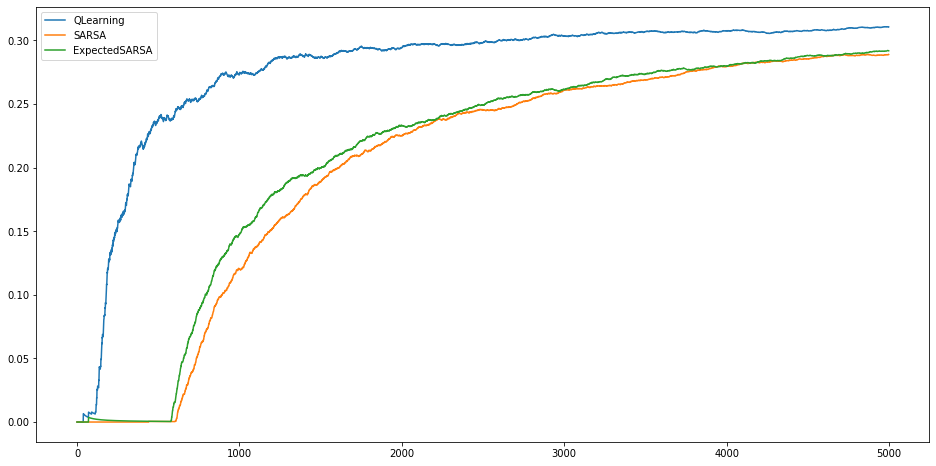

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.plot(exp_sarsa_logs.cumsum() / (pd.Series(np.arange(exp_sarsa_logs.shape[0]))+1), label="ExpectedSARSA")
plt.legend()